In [2]:
## Preamble: Package Loading
import numpy as np
import ipywidgets as ipw
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import itertools as iter
import os
import json
import re
import regex
# Preamble working directory retreival
wkng_folder = os.getcwd()

<h1> Parametric Panel, Selection, and Control </h1>
<h3> Proposal Supplement </h3>
By: Eric Penner

<h2> 1 Model Setup </h2>

<h3> 1.1 Base Model </h3>

For each time period $t \in \{1,2, \ldots, T\}$, component $ d\in \{1,2, \ldots , p_1\}$ of $Z_{1jt}$, and cross-section $j \in \{1,2,\ldots, q\}$ where $\{q,T\} \in \mathbb{N}$ consider the following,

\begin{align} 
Y_{jt} &= \beta_0 + [\; Z_{1jt}' \;\; Z_{2jt}' \;] \beta_1 + e_j + \varepsilon_{jt} \\[1em]
%
Z_{1jt,d} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jt,d} \tag{2d} \\[1em]
%
E(&\varepsilon_{jt} | Z_{1jt} , Z_{2jt}) = E(\varepsilon_{jt} | Z_{1jt}) \neq 0  \\[1em]
%
E(& V_{jdt} | Z_{1j(t-1)},\ldots,Z_{1j(t-c)},Z_{2jt},W_{jt}) = 0 
%
\end{align}


Where for $\{p_1,p_2,c,w,w_1,w_2, \ldots ,w_q \} \subset \mathbb{N}$, 

* $Y_{jt}$, and $\varepsilon_{jt}$ are scalar random variables, 

* $Z_{2jt}$ is a $p_2$ dimesion vector of exogenous random variables, 

* $Z_{1jt}$  is a vector of endogenous random variables having dimension $p_1$. 

* $e_j$ is a scalar fixed effect, 

* $\varepsilon_{jt}$ is a scalar error term, 

* $V_{jt,d}$ is a scalar error term. 

* $W_t = [ \; W_{1t} \;\; W_{2t} \;\; \cdots \;\; W_{wt} \;]'$ is vector of instrumental variables of dimension $w$, 

* $W_{jt} = [\;W_{jt,1} \;\; W_{jt,2} \;\; \cdots \;\; W_{jt,w_j} \;]'$ is a vector of instrumental variables of dimension $w_j$ where $\{W_{jt,l}\}_{l=1}^{w_j} \subset \{W_{t,l}\}_{l=1}^{w}$ and there exists at least one pair $j,j'  \in \{1,2, \ldots , p\}$, where $j \neq j'$, such that $\{W_{jt,l}\}_{l=1}^{w_j} \neq \{W_{j't,l}\}_{l=1}^{w_{j'}}$.

* $\beta_0$ and $\alpha_{0jd}$  are scalars, 

* $\beta_1$, $\alpha_{1d}$, $\alpha_{2d}$, are $p_1 +p_2 = p$, $p_2$, and $w_j$ dimensional vectors of real numbers respectively. 

* Lastly for notational convenience let define the following equivalences, 
\begin{align*} 
Z_{jt} = [\; Z_{1jt}' \;\; Z_{2jt}' \;]'  \;\;\; \text{ and } \;\;\; V_{jt} = [ \; V_{jt,1} \; V_{jt,2} \; \cdots \;V_{jt,p_1}\;]'
\end{align*}

<h3> 1.2 Differenced Model with Control Functions </h3>

As shown in the the main proposal I treat the presence of endogeneity with the control function approach and then first difference the primary equation to eliminate fixed effects, resulting in the following. 

\begin{align} 
\Delta Y_{jt} &= \Delta Z_{jt}'\beta_1 + \sum_{d=1}^{p_1} \Delta f_{jd}(V_{jt,d}) + \Delta u_{jt} \\[1em]
%
Z_{1jt,d} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jt,d} \tag{2d}\\[1em]
E(&\Delta u_{jt} | \{Z_{j_k},W_{jk},X_{jk},V_{jk} \}_{k=1}^t) = 0 \\[1em]
%
E(& V_{jt} | Z_{1jt-1},\ldots,Z_{1jt-c_1},Z_{2jt},W_{jt}) = 0 
%
\end{align}

<h3>  1.3 Identification of $\beta_1$ </h3>

I use a variation on the identification procedure in Manzan and Zerom to identify $\beta_1$, this required the construction of the following density ratios, functions, and vectors.

Density Ratio  
\begin{align*} 
\phi_{jt} = \frac{ \prod_{d=1}^{p_1}p(V_{jt,d},V_{jc,d}) }{p(V_{jt},V_{jc})} 
\end{align*}

Conditional Expectations 

\begin{align*} 
H_{jd}(\Delta Z_{jt}) &= E[\phi_{jt} \Delta Z_{jt} |V_{jt,d},V_{jc,d}] \hspace{1.25cm} 
%
H_{jd}(\Delta Y_{jt}) = E[\phi_{jt} \Delta Y_{jt} |V_{jt,d},V_{jc,d}] \\
%
H_j(\Delta Z_{jt}) &= \sum_{d=1}^{p_1} H_{jd}(\Delta Z_{jt})  \hspace{2.5cm}
%
H_j(\Delta Y_{jt}) = \sum_{d=1}^{p_1} H_{jd}(\Delta Y_{jt})  \end{align*} 

Vectors

\begin{align*}
H(\Delta Y_t)  &= [ \; H_1(\Delta Y_{1t}) \;\; H_2(\Delta Y_{2t}) \;\; \cdots \;\; H_q(\Delta Y_{qt}) \; ]' \\[1em]
H(\Delta Z_t)  &= [ \; H_1(\Delta Z_{1t}) \;\; H_2(\Delta Z_{2t}) \;\; \cdots \;\; H_q(\Delta Z_{qt}) \; ]' \\[1em]
%
\Delta Y_t &= [ \; \Delta Y_{1t} \;\;  \Delta Y_{2t} \;\; \cdots \;\; \Delta Y_{qt} \;] '  \\[1em]
%
\Delta Z_t &= [ \; \Delta Z_{1t} \;\;  \Delta Z_{2t} \;\; \cdots \;\; \Delta Z_{qt} \;] ' 
\\[1em] 
\Delta u_t &=  [ \; \Delta u_{1t} \;\;  \Delta u_{2t} \;\; \cdots \;\; \Delta u_{qt} \;] ' 
\end{align*}

<h4> 1.3.1 Lemma 1 </h4>

Letting $\phi_{t} = diag\big( \{\phi_{jt}\;\}_{j=1}^q \big)$, if for all $t\in \{2, \ldots , T\}$

1. $E\big[ f_{jd}(V_{jdt})\big] = E\big[ f_{jd}(V_{jdc}) \big] 
$ for all $d\in \{1,2, \ldots , p_1\}$, $j\in \{1,2, \cdots , q\}$, and 

2. $E \Big( [\Delta Z_t - H(\Delta Z_t)]' [\Delta Z_t - H(\Delta Z_t)] \Big)$ is positive semi definite,

Then $\beta_1$ is identified, in particular,

\begin{align*} 
\beta_1 = E \Big( [\Delta Z_t - H(\Delta Z_t)]' \phi_{t} [\Delta Z_t - H(\Delta Z_t)] \Big)^{-1}E \Big( [\Delta Z_t - H(\Delta Z_t)]' \phi_{t} [\Delta Y_t - H(\Delta Y_t)] \Big)
\end{align*} 

<h2> 2.0 Post Secondary Equation Estimation </h2>

Here we will discuss the estimation of $\beta_1$ assuming that estimates $\hat{V}_{jt,d}$ have already been generated by some as yet unspecified procedure. Estimation of the secondary equation will be discussed in the following sections

<h3> 2.1  Density Estimation </h3>

The following function(s) implement a rosenblatt kernel estimator where 

$$ \hat{p}(\hat{V}_{dt,l},\hat{V}_{d(t-1),l}) 
= (nh_1h_2)^{-1}\sum_{ i = 2 }^T k_1[h_1^{-1}(\hat{V}_{di,l} -\hat{V}_{dt,l})]k_2[h_2^{-1}(\hat{V}_{di,l} -\hat{V}_{d(t-1),l})]  
$$ 

<h4>  2.1.1 Density Estimation: Function to Calculate Kernel Values </h4>

In [3]:
def mvkernel(x,kernel):  
    """ 
PURPOSE: Calculate product kernel values at points x
    
INPUTS
x       points of kernel evaluation (3)x(n)x(dim of x)
kernel  Scalar value indicating which kernel to use where
           1 = Rectangular
           2 = Triangular
           3 = Biweight
           4 = Silverman's 
           5 = Epanechnikov order 2
           6 = Epanechnikov order 2 alt
           7 = Epanechnikov order 4
           8 = Epanechnikov order 6
           9 = Gaussian order 2
           10 = Gaussian order 4
           11 = Gaussian order 6

OUTPUTS
ker     product of kernel values along axis = 0
    """
    
    if kernel == 1:
        # Rectangular Kernel  
        ker = 1/2*(np.absolute(x)<1)
    elif kernel == 2:
        # Triangular Kernel
        ker = (1-np.absolute(x))*(np.absolute(x)<1)
    elif kernel == 3:
        # Biweight Kernel
        ker = (15/16*(1-x**2)**2)*(np.absolute(x)< 1)
    elif kernel == 4:
        # Silvermans Kernel 
        ker = 0.5*np.exp(-np.absolute(x)/np.sqrt(2))*np.sin(np.absolute(x)/np.sqrt(2) + np.pi/4)   
    elif kernel == 5:
        # Epanechnikov order 2
        ker = 0.75*(1-x**2)*(np.absolute(x)<=1)
    elif kernel == 6:
        # Epanechnikov order 2 (alt)?
        ker = (0.75/np.sqrt(5))*(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5))
    elif kernel == 7:
        # Epanechnikov order 4
        ker  = (0.75/np.sqrt(5))*(15/8-7/8*x**2)*(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5))
    elif kernel == 8:
        # Epanechnikov order 6
        ker  = ((0.75/np.sqrt(5))*(175/64-105/32*x**2+ 231/320*x**4)
                                 *(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5)))
    elif kernel == 9:
        # Gaussian order 2
        ker  = (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    elif kernel == 10:
        # Gaussian order 4
        ker  = (3/2 -1/2*x**2)*(1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    elif kernel == 11:
        # Gaussian order 6
        ker  = (15/8-5/4*x**2+1/8*x**4)*(1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    else:
        print('Incorrect Kernel Number')

    if x.ndim > 2:
        # Value of each product kernel
        ker = np.prod(ker,axis = 0)

    return ker

<h4> 2.1.2 Density Estimation:  Function to Calculate Estimated Density</h4>

In [4]:
def mvden(x,p,h,kernel): 
    """
Purpose: Multivariate Rosenblatt Kernel Density Estimator at points p based on sample x    
    
INPUTS
x       np.array of data having order (number of observations)x(dimension of X)
P       np.array of points of evaluation having order (number of points)x(dimension of X)
h       Bandwidth vector of order (1)x(dimension of X)
kernel  Scalar value indicating which kernel to use where
           1 = Rectangular
           2 = Triangular
           3 = Biweight
           4 = Silverman's 
           5 = Epanechnikov order 2
           6 = Epanechnikov order 2 alt
           7 = Epanechnikov order 4
           8 = Epanechnikov order 6
           9 = Gaussian order 2
           10 = Gaussian order 4
           11 = Gaussian order 6

OUTPUTS
den      Density at each point of evaluation (number of observation)x1
    """
    
    x = np.array(x)
    p = np.array(p)
    h = np.array(h)
    
    if x.ndim == 1:
            m0 = (x.reshape(1,x.shape[0])-p.reshape(p.shape[0],1))/h
    elif x.ndim == 2:
        m0 = np.zeros((x.shape[1],p.shape[0],x.shape[0])) 
        for i in range(0,x.shape[1]):
            m0[i,:,:] = (x[:,i].reshape(1,x.shape[0])-p[:,i].reshape(p.shape[0],1))/h[i]

    ker = mvkernel(m0,kernel)/(x.shape[0]*np.prod(h))
    den = np.dot(ker,np.ones(x.shape[0]))

    return den

<h4> 2.1.3  Density Estimator Demonstration: Setup </h4>

In order to validate the density function code in a setting similar to ours I will perform the following,

$$ \hat{p}(X_{t},X_{(t-1)}) 
= [(T-1)h_1h_2]^{-1}\sum_{l=2}^Tk_1[h_1^{-1}(X_{l} -X_{t})]k_2[h_2^{-1}(X_{l} - X_{(t-1)})]  \;\; \text{ where } \;\; X_t \sim N(0,1)
$$ 


<h4> 2.1.4  Density Estimator Demonstration: Data Generation </h4>

In [5]:
# Number of data points
n = 100
mu = np.array([0])
var = np.array([1])
x = np.random.normal(mu,var,n).reshape(n,1)
x = pd.DataFrame(x,columns = ['x1'])
x['Bx1'] = x.x1.shift(1)
x = x[1:]
## Points of Evaluation Generation and Stacking
npts = 20
# Smallest coordinate value
pl = -2
# Largest coordinate value
pu =  2
p = np.linspace(pl,pu,npts).reshape((20,1))
p = np.hstack((p,pl*np.ones((20,1))))
for j in np.arange(1,20,1): 
    pt = np.hstack((p[0:20,0].reshape((20,1)),p[j,0]*np.ones((20,1))))
    p = np.vstack((p,pt))
p = pd.DataFrame(p, columns =['p1','p2'])

# Standard Normal pdf
fnrm = lambda x: np.exp(-x**2/2)/np.sqrt(2*np.pi)

<h4> 2.1.3  Density Estimator Demonstration: Plotting Function </h4>

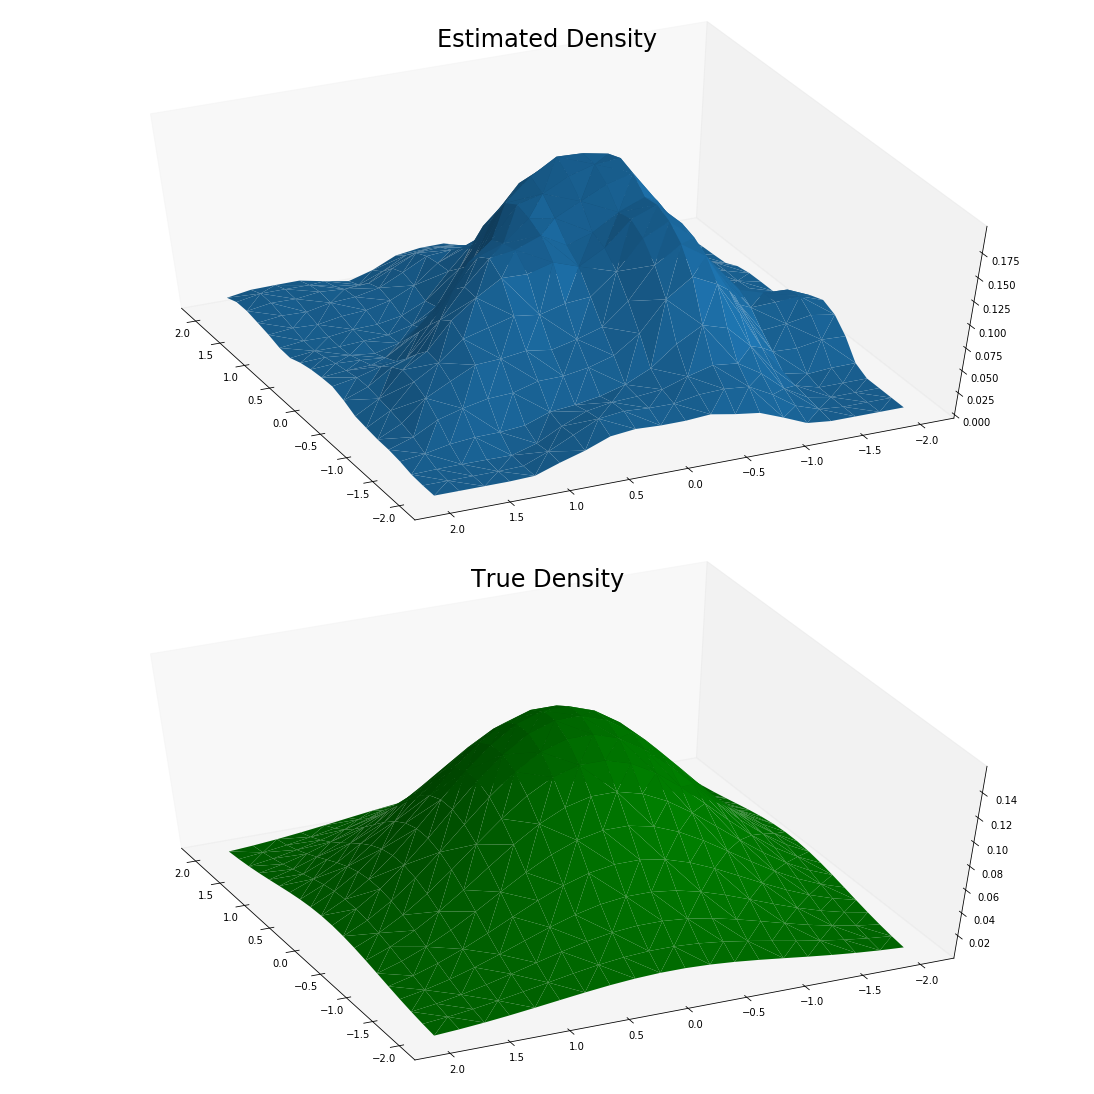

In [6]:
# Plug in Bandwidths
h = 0.8*x.shape[0]**(-1/5)*x.std(0)
# Collection into an array
h = np.array([h , h])
# Density estimation functions call
p['xden'] = mvden(np.array(x),np.array(p),h[0],6)

plt.close('all')
# Plotting
fig, ax = plt.subplots(2,1,subplot_kw = {'projection':'3d'})
fig.set_figheight(15)
fig.set_figwidth(15)
#fig.suptitle("Density",fontsize = 20)
fig.tight_layout( pad = 0, h_pad = 0 , w_pad = 0)
ax[0].plot_trisurf(p.p1,p.p2,p.xden,alpha = 1)
ax[0].set_title('Estimated Density', fontsize = 24)
ax[0].grid(b=None)
ax[1].plot_trisurf(p.p1,p.p2,fnrm(p.p1)*fnrm(p.p2),alpha = 1, color = 'g')
ax[1].set_title('True Density',fontsize = 24)
ax[1].grid(b=None)
el = 50
az = 155
ax[0].view_init(elev=el, azim=az)
ax[1].view_init(elev=el, azim=az)
plt.show()

<h3> 2.2 Density Ratio Construction </h3> 

I will construct the following ratios directly within the main function code presented below

\begin{align*} 
\hat{\phi}_{jt} = \frac{ \prod_{d=1}^{p_1}\hat{p}(\hat{V}_{jt,d},\hat{V}_{j(t-1),d}) }{\hat{p}(\hat{V}_{jt},\hat{V}_{j(t-1)})}
%
\hspace{1cm}
%
\hat{\theta}_{jt,d} = \frac{ \prod_{l \neq d}^{p_1}\hat{p}(\hat{V}_{jt,l},\hat{V}_{j(t-1),l}) }{\hat{p}(\hat{V}_{jt},\hat{V}_{j(t-1)})}
\end{align*}

<h3> 2.3 H Function Estimation:</h3>

The following function implement a nadaraya watson estimator of the H functions 
$$ \hat{H}_{j,d}(\Delta Z_{jt,a}) = [(T-1)b_1b_2]^{-1} \sum_{l \neq t , l > 1}^T k_1[b_1^{-1}(V_{jl,d} - V_{jt,d})] k_2[b_2^{-1}(V_{j(l-1),d} - V_{j(t-1),d})] \hat{\theta}_{jl,d} \Delta Z_{jl,a} $$

<h4> 2.3.1 H Function Estimation: Function Code </h4>

In [7]:
def Nw_H_pan(regrsnd,theta,regressr,p,h,kernel,l10 = 1):
    """
INPUTS 
regrsnd    Regressand of the regression (Delta Y or Delta Z) (# of obs - 1) x 1
theta      Density ratio which will multiply regressand (# of obs - 1) x 1
regressr   Vector of conditioning variables (V_{j,d}) (# of obsn -1 ) x 1
p          points of evaluation (npoints x 2) 
b          Vector of Bandwidths [b1, b2] 
l10        Leave one out indicator; 1 leave one out, 0 dont

OUTPUTS
H       Vector of H function estimates corresponding to arguments p
    """
    # Converting regressr input into np.array
    reg = np.array(regressr)
    # Setting up full regressor array where for a = 1,2,...,T-1, where 
    #           reg[a,:] =  [ V_{j(a+1),d} ,  V_{j(a),d} ]
    #reg = np.vstack((reg[:-1],reg[1:])).T
    # Converting regrsnd input to np.array
    y = np.array(regrsnd)
    # Converting theta input to np.array
    tht = np.array(theta)
    # Points of evaluation
    p = np.array(p)
    # Converting bandwidth input to np.array
    b = np.array(h)
    # Product of regressands and theta ratios
    y_tht = y*tht

    # Construction of each kernel argument array by broadcasting
    m1 = (reg[:,0].reshape(1,reg.shape[0])-p[:,0].reshape(p.shape[0],1))/b[0]
    m2 = (reg[:,1].reshape(1,reg.shape[0])-p[:,1].reshape(p.shape[0],1))/b[1]
    # Initializing the kernel argument array 
    m0 = np.zeros((2,p.shape[0],reg.shape[0]))
    # Placing broadcasted arrays in m0
    m0[0,:,:] = m1
    m0[1,:,:] = m2

    # Calculating kernel values
    ker = mvkernel(m0,kernel)

    # Matrix of theta ratios so that observations match the first argument of kernels in H1
    H0 = np.tile(y_tht,(p.shape[0],1))
    # Multiply these two together
    H1 = ker*H0;
    # Deleting the diagonal which converts to a leave one out style
    if l10 == 1:
        H2 = H1 - H1*np.eye(H1.shape[0]);
    else: 
        H2 = H1
    # Finishing the calculation at each point in X
    H = 1./((reg.shape[0]-1)*b[0]*b[1])*np.dot(H2,np.ones((H2.shape[1],1)))
    return H

<h4>  2.3.2  H Function Estimation Demonstration: Setup </h4>

Here we generate data as follows

$$
Y_t = f_1(a_1,b_1,X_{t-1}) + f_2(a_2,b_2,X_{t}) + \varepsilon_t \;\;\; \text{ where } \;\;\; X_t,\varepsilon \sim N(0,1) 
$$

where $f_1$ and $f_2$ are defined in the following code. Its difficult to validate the function code with an example exactly like the dgp we are interested in so instead I demonstrate the following estimation. 

$$
\hat{E}[Y_t|X_t,X_{t-1}] = [(T-1)b_1b_2]^{-1} \sum_{l \neq t , l > 1}^T k_1[b_1^{-1}(X_{l} - X_{t})] k_2[b_2^{-1}(X_{(l-1)} - X_{(t-1)})] \hat{\theta}_{l} Y_l \;\;\; \text{ where } \;\;\; \hat{\theta}_{l} = \frac{1}{\hat{p}(X_{l},X_{(l-1)})}
$$

<h4> 2.3.3  H Function Estimation Demonstration: Data Generation </h4>

In [8]:
## Regression Function Definition
f1 = lambda a,b,x : a*np.cos(b*x)
f2 = lambda a,b,x : a*np.sin(b*x)
#f1 = lambda a,b,x: a*x**b
#f2 = lambda a,b,x: a*x**(b)

## Regressor and Error Generation
# Number of observations
n = 500
# Vector of means
mu = np.array([0,0])
# Variance Covariance Matrix
var = np.array([[1,0],[0,1]])
# Data generation
x = np.random.multivariate_normal(mu,var,n)
# Coverting to pandas dataframe
x = pd.DataFrame(x,columns = ['x1','ep'])
# Backshifted regressor matrix
reg = pd.concat([x.x1,x.x1.shift(1)],axis = 1).iloc[1:,:]
## Regressand Generation
# Parameters for conditional expectation functions
a = [ 3 , 1 ]
b = [ 2 , 3 ] 
# Conditional expectation functions at data points
x2 = pd.DataFrame(f1(a[0],b[0],np.array(reg.iloc[:,0]))
                  +f2(a[1],b[1],np.array(reg.iloc[:,1])),
                  columns = ['m'])
# Regressand Generation
x2['y'] = x2.m + np.array(x.ep[1:])

## Points of Evaluation Generation
# Smallest coordinate value
pl = -2
# Largest coordinate value
pu =  2
# Grid of points will be npts X npts
npts = 20
# Points generation and Stacking
p = np.linspace(pl,pu,npts).reshape((20,1))
p = np.hstack((p,pl*np.ones((20,1))))
for j in np.arange(1,20,1): 
    pt = np.hstack((p[0:20,0].reshape((20,1)),p[j,0]*np.ones((20,1))))
    p = np.vstack((p,pt))
p = pd.DataFrame(p, columns =['p1','p2'])

## Constructing the Theta Ratio: 1/p(x_1t,x_1(t-1))
# Plug-in Bandwidth
h = 1.45*reg.shape[0]**(-1/5)*np.array(reg).std(0)
# Density Estimate Function Call
den = mvden(reg,reg,h,10)
# Theta Ratio
tht1 = 1/den

<h4> 2.3.4  H Function Estimation Demonstration: Plotting Function </h4>

In [9]:
def Nw_H_plot(c_h,y,tht1,reg,p,ker,a,b,el,az):
    plt.close('all')
    h = c_h*reg.shape[0]**(-1/5)*np.array(reg).std(0)
    ## Function Call
    H = Nw_H_pan(y,tht1,reg,p,h,ker,0)
    # Plotting
    fig, ax = plt.subplots(2,1,subplot_kw = {'projection':'3d'})
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax[0].plot_trisurf(p.p1,p.p2,H[:,0])
    ax[0].set_title('Estimated Function')
    ax[1].plot_trisurf(p.p1,p.p2,f1(a[0],b[0],p.p1)+f2(a[1],b[1],p.p2),color = 'g')
    ax[1].set_title('True Function')
    ax[0].view_init(elev=el, azim=az)
    ax[1].view_init(elev=el, azim=az)
    plt.show()

<h4> 2.3.5 H Function Estimator Demonstration: Interactive Widgets Setup </h4>

In [10]:
box_hlayout = box_layout = ipw.Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='90%')

box_vlayout = ipw.Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='10%',
                    height = 'auto',
                    justify_content='space-between')

s_az = ipw.IntSlider(min = 0 , max = 360, value = 45, step = 15, description = 'Azimuth',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'} )
s_c = ipw.FloatSlider(min = 0.1 , max = 4, value = 2.5, step =0.2, description = 'Bandwidth Constant',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'})
s_ker = ipw.IntSlider(min = 1 , max = 11, value = 6, description = 'Kernel',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'})
s_el = ipw.IntSlider(min = -90 , max = 90, value = 30, step = 15, description = 'Elevation',orientation = 'vertical'
                  ,length = 'auto',layout = box_vlayout,  style = {'description_length': 'initial'} )

out = ipw.interactive_output(Nw_H_plot,{'c_h':s_c,'y': ipw.fixed(x2['y']),'tht1': ipw.fixed(tht1) 
                                ,'reg': ipw.fixed(reg),'p': ipw.fixed(p),'ker': s_ker,'a':ipw.fixed(a),'b': ipw.fixed(b) ,'az':s_az ,'el': s_el})
ipw.VBox([ipw.HBox([out,s_el])   
          ,ipw.VBox([s_az,s_c,s_ker])])

VBox(children=(HBox(children=(Output(), IntSlider(value=30, description='Elevation', layout=Layout(align_items='stretch', display='flex', flex_flow='column', height='auto', justify_content='space-between', width='10%'), max=90, min=-90, orientation='vertical', step=15))), VBox(children=(IntSlider(value=45, description='Azimuth', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='90%'), max=360, step=15, style=SliderStyle(description_width='initial')), FloatSlider(value=2.5, description='Bandwidth Constant', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='90%'), max=4.0, min=0.1, step=0.2, style=SliderStyle(description_width='initial')), IntSlider(value=6, description='Kernel', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='90%'), max=11, min=1, style=SliderStyle(description_width='initial'))))))

<h2> 3 Secondary Equation Estimation </h2>

The specification of equation (2d) is quite general where; intercepts $\alpha_{0jd}$, and coefficients on exogenous regressors $\alpha_{1jd}$ are unique to each cross-section. Furthermore, although instruments $W_{jt}$ are shared across cross-sections their coefficients $\alpha_{2jd}$ are unique, and as yet there is no sense in which error terms $V_{jdt}$ are correlated across cross-section. As a result there are a number of restrictions on the regressors and parameters of equation (2d) which can be imposed and have a substantial effect on the manner in which $V_{jdt}$ will be estimated. 

** Note: **  For all vectors of dimension greater than two, I reference the individual elements of each vector by including a comma followed by a scalar value in the subscript. I reference the entire vector whenever the comma is omitted. For example,

\begin{align*} 
W_{jt} = \begin{bmatrix} W_{jt,1} & W_{jt,2} & \cdots & W_{jt,w_j} \end{bmatrix}'
\end{align*}

<h3> 3.1: Case 1 </h3> 

* Cross-sectional data is not panel, meaning that in this case there is no assumption restricting crossections to have common coefficients in the secondary equations.

* $W_{jt}$ is an **known** subset of $W_{t}$.

If so, estimation is comprised of q separate OLS regressions.
\begin{align*} 
(\hat{\alpha}_{0jd}, \hat{\alpha}_{1jd},\hat{\alpha}_{2jd}) 
 = \arg \min \sum_{t=1}^T\left(Z_{1jdt} - \alpha_{0} -  Z_{2jt}'\alpha_{1} - W_{jt}'\alpha_{2} \right)^2
\end{align*}
where $\alpha_0 \in \mathbb{R}$, $\alpha_{1} \in \mathbb{R}^{p_2}$, and $\alpha_{2} \in \mathbb{R}^{w_j}$. So that 
$$\hat{V}_{jdt} = Z_{1jdt} - \hat{\alpha}_{0jd} - Z_{2jt}'\hat{\alpha}_{1jd} - W_{jt}'\hat{\alpha}_{2jd}$$

<h4> 3.1.1: Case 1 Estimation </h4>

Below is a function which implements simple ols regression

In [11]:
def ols(df,inpt):
    """
INPUTS
df                (pandas df) Data Frame with all regressors
inpt              (dict) Dictionary with the following
  inpt['dep']     (string) Name of dependent variable contained in df
  inpt['reg']     (list of strings) names of regressors in df 
  inpt['cons']    (0,1) Indicator for whether a constant should be included

OUTPUTS 
out               (list of lists) List of the following
  out[0]          (list) Estimated coefficients
  out[1]          (list) Residuals
  out[2]          (list) Estimated conditional expectation
    """
    # Extracting input variables
    dep = inpt['dep']
    reg = inpt['reg']
    cons = inpt['cons']
    # Determining length of df (number of obs)
    n = df.shape[0]
    # Extracting Dependent Variable from df
    Y = df.loc[:,dep].values.reshape(n,1)
    # Extracting Regressors from df
    if len(reg) == 1:
        X = df.loc[:,reg].values.reshape(n,1)
    elif len(reg) > 1: 
        X = df.loc[:,reg].values
    # Adding column of ones if a constant is included
    if cons == 1: 
        X = np.hstack((np.ones((n,1)),X))
    # Estimated regression coefficients
    alpha = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
    # Estimated Conditional Expectation
    Yhat = X.dot(alpha)
    # Residuals of the regression
    res = Y - X.dot(alpha)
    # Constructing output list of lists
    out = [alpha.T.tolist()[0],res.T.tolist()[0],Yhat.T.tolist()[0]]
    return out

<h3> 3.2 Case 2: </h3>

* Cross-sectional data is not panel, meaning that in this case there is no assumption restricting crossections to have common coefficients in the secondary equations.

* $W_{jt}$ is an ** unknown ** subset of $W_{t}$.

If so, estimation is comprised of $q$ separate regressions, each of which will incorporate a subset selection routine. Let $\alpha_{2jd} =  [\;\alpha_{2jd,1} \;\; \alpha_{2jd,2} \;\; \cdots \;\; \alpha_{2jd,w} \; ]$ where $\alpha_{2jd,l} = 0$ whenever $W_{t,l} \notin W_{jt}$. To facilitate subset selection I apply the lasso estimator by imposing an $\ell^1$ penalty on estimated coefficients $\hat{\alpha}_{2jd}$ .

\begin{align*} 
(\hat{\alpha}_{0jd}, \hat{\alpha}_{1jd},\hat{\alpha}_{2jd})  = \arg \min \sum_{t=1}^T\left(Z_{1jdt} - \alpha_{0} -  Z_{2jt}'\alpha_{1} - W_{t}'\alpha_{2} \right)^2 \;\; \text{ subject to } \;\; \sum_{l = 1}^w |a_{3,l}| \leq \lambda
\end{align*}
where $\alpha_0 \in \mathbb{R}$, $\alpha_{1} \in \mathbb{R}^{p_2}$, and $\alpha_{3} \in \mathbb{R}^{w}$. So that again,
 $$\hat{V}_{jdt} = Z_{1jdt} -\hat{\alpha}_{0jd} - Z_{2jt}'\hat{\alpha}_{1jd} - W_{t}'\hat{\alpha}_{2jd}$$ 


<h4> 3.2.1: Case 2 Estimation </h4>

Given that the data is not panel q seperate ols regressions will also be estimated but here I will implement the lasso algorithm (Tibshrani (1996) JRSSB).

In [12]:
### lasso estimator goes here. 

<h3> 3.3 Case 3: </h3>

* $W_{jt}$ is an known subset of $W_{t}$,

* Cross-sectional data is panel, meaning for all $j,j' \in \{1,2, \ldots,q\}$

    1. $\alpha_{1jd} =\alpha_{1j'd} \equiv \alpha_{1d}$  

    2.  $\alpha_{2jd,l} = \alpha_{2j'd,l} \equiv \alpha_{2d,l}$ whenever $W_{t,l} \in W_{jt}$ and $W_{t,l} \in W_{j't}$ 


Let
\begin{align*}
1[W_{t,l} \in W_{tj}] = 
\begin{cases} 
1 & \text{ if } W_{t,l} \in W_{tj} \\ 
0 & \text{otherwise}
\end{cases}
\end{align*}

and $M_j = \text{diag}(\{1[ W_{t,l} \in W_{jt}] \}_{l=1}^w)$ so that,

\begin{align*}
Z_{1jdt} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jdt} \\
& =\alpha_{0jd} + Z_{2jt}' \alpha_{1d} + W_{t}'M_j \alpha_{2d} + V_{jdt}
\end{align*}

Now let 
* $\Delta Z_{1jdt} = Z_{1jdt} - Z_{1jd(t-1)}$
* $\Delta Z_{2jdt} = Z_{2jdt} - Z_{2jd(t-1)}$ 
* $\Delta W_{t} = W_{t} - W_{t-1}$, 
* $\Delta V_{jdt} = V_{jdt} - V_{jd(t-1)}$ 

so that, 

\begin{align*} 
\Delta Z_{1jdt} =\Delta Z_{2jt}' \alpha_{1d} + \Delta W_{t}'M_j \alpha_{2d} + \Delta V_{jdt}
\end{align*}
As a result,

\begin{align*} 
(\hat{\alpha}_{1d},\hat{\alpha}_{2d})  = \arg \min \sum_{j=1}^q\sum_{t=1}^T\left( \Delta Z_{ijt} -  \Delta Z_{2jt}'\alpha_{1} - \Delta W_{t}'M_j\alpha_{2} \right)^2 
\end{align*}

So that given
\begin{align*} 
\alpha_{0jd} =  E(V_{jdt} + \alpha_{0jd}) =
E( Z_{1jdt} - Z_{2jt}'\alpha_{1d} - W_{t}'M_j\alpha_{2d}) 
\end{align*}

we have

$$\hat{V}_{jdt} = Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'M_j\hat{\alpha}_{2d} - T^{-1}\sum_{t=1}^T  (Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'M_j\hat{\alpha}_{2d}) $$
    

<h4> 3.3.1: Case 3 Estimation </h4>

This is simple fixed effect panel data estimator, I will implement is directly in the full code below. 

In [13]:
def panel_fe(df,inpt):
    """
INPUTS
df                (pandas df) Data Frame with regressand all regressors
inpt              (dict) Dictionary with the following
  inpt['dep']     (string) Name of dependent variable contained in df
  inpt['ref']     (list of strings) names of regressors in df 
  inpt['cons']    (0,1) Indicator for whether a constant should be included

OUTPUTS 
out               (list of lists) List of the following
  out[0]          (list) Estimated coefficients
  out[1]          (list) Residuals
  out[2]          (list) Estimated conditional expectation
    """
    # Extracting input variables
    dep = inpt['dep']
    reg = inpt['reg']
    cons = inpt['cons']
    # Determining length of df (number of obs)
    n = df.shape[0]
    # Extracting Dependent Variable from df
    Y = df.loc[:,dep].values.reshape(n,1)
    # Extracting Regressors from df
    if len(reg) == 1:
        X = df.loc[:,reg].values.reshape(n,1)
    elif len(reg) > 1: 
        X = df.loc[:,reg].values
    # Adding column of ones if a constant is included
    if cons == 1: 
        X = np.hstack((np.ones((n,1)),X))
    # Estimated regression coefficients
    alpha = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
    # Estimated Conditional Expectation
    Yhat = X.dot(alpha)
    # Residuals of the regression
    res = Y - X.dot(alpha)
    # Constructing output list of lists
    out = [alpha.T.tolist()[0],res.T.tolist()[0],Yhat.T.tolist()[0]]
    return out

<h3> 3.4: Case 4 </h3>

* $W_{jt}$ is an **unknown** subset of $W_{t}$,

* Cross-sectional data is panel, meaning for all $j,j' \in \{1,2, \ldots,q\}$

    1. $\alpha_{1jd} =\alpha_{1j'd} \equiv \alpha_{1d}$  

    2. $\alpha_{2jd,l} = \alpha_{2j'd,l} \equiv \alpha_{2d,l}$ whenever $W_{t,l} \in W_{jt}$ and $W_{t,l} \in W_{j't}$ 

Inhereting notation from case 3 we again have

\begin{align*} 
\Delta Z_{1jdt} =\Delta Z_{2jt}' \alpha_{1d} + \Delta W_{t}'M_j \alpha_{2d} + \Delta V_{jdt}
\end{align*}

In order to introduce our selection procedure we will estimate the coefficients on $W_{t}$ as if that are not identical, then average the non zero estimates to construct a single estimate.  Consider, 

\begin{align*} 
(\hat{\alpha}_{1d},\hat{\alpha}_{2d})  = \arg \min \sum_{j=1}^q\sum_{t=2}^T\left( \Delta Z_{1jdt} -  \Delta Z_{2jt}'\alpha_{1} - \Delta W_{t}'\alpha_{2j} \right)^2 \;\; \text{ subject to } \;\; \sum_{l=1}^w|\alpha_{2j,l}| \leq \lambda \;\;  \text{ for all } 1 \leq j \leq q
\end{align*}

Consequently define for some $\varepsilon > 0$ 

\begin{align*} 
\tilde{\alpha}_{2d,l} = \frac{\sum_{l=1}^q \hat{\alpha}_{2jd,l} 1[ \hat{\alpha}_{2jd,l} > \varepsilon ] }{ \sum_{l=1}^q 1[ \hat{\alpha}_{2jd,l} > \varepsilon] }
\end{align*}

Now let $\tilde{\alpha}_{2d} = [ \; \tilde{\alpha}_{2d,1} \;\; \tilde{\alpha}_{2d,2} \;\; \cdots \;\; \tilde{\alpha}_{2d,w}  \; ]'$ and $\tilde{M}_{jd} = \text{diag}( \{ 1[\hat{\alpha}_{2jd,l} > \varepsilon ] \}_{l=1}^w)$ so that, 

\begin{align*}
\hat{V}_{jdt} = Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'\tilde{M}_{jd}\tilde{\alpha}_{2d} - T^{-1}\sum_{t=1}^T  (Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'\tilde{M}_{jd}\tilde{\alpha}_{2d}) 
\end{align*}

<h4> 3.4.1: Case 4 Estimation </h4>

This is fixed effect panel data estimator with cross-section wise lasso estimation, I will implement it here.  

In [14]:
## panel estimator with lasso goes here.

<h2> 4 Estimator </h2>

<h3> 4.1 Estimator function </h3>

In [15]:
def psc_est(data_pan,data_inst,data_err,inpt):
    """
INPUTS
data_pan           (pandas df) panel of all primary regressors each crss sect, and time period
data_inst          (pandas df) all possible instruments 
data_err           (pandas df) panel df of all error terms, only used if inpt['orcl'] == 1
inpt               (dict) The following input var. 
  inpt['cin']        (string) names of cross section var. in data_pan & data_err
  inpt['tin']        (string) names of cross section var. in data_pan & data_err
  inpt['ntp']        (int) number time periods
  inpt['ncs']        (int) number of crossections
  inpt['n_end']      (int) number of endogenous variables 
  inpt['n_exo']      (int) number of exogenous variables
  inpt['t_inst']
  inpt['dep_nm']     (string) name of dependent varaible in primary regression in data_pan 
  inpt['en_nm']      (list of strings) names of endogenous variables in data_pan
  inpt['ex_nm']      (list of strings) names of exogenous variables in data_pan
  inpt['in_nm']      (list of lists of string) names of instruments relevant to each cross section
    inpt['in_nm'][i]   (list of strings) names of var. in data_inst used by cin == i (all if kwnsub=0)   
  inpt['sec_pan']    (int: 0,1) Indicator for if secondary equation data is panel
  inpt['kwnsub']     (int: 0,1) Indicator for if W_{i} is a known subset of W for all cin 
  inpt['orcl']       (int: 0,1) Indicator for if V_i,j is observed for each cin = j, and endog var. j 
  inpt['k_mvd']      (int: [0-11]) kernel used for multi var density est. see (?mvkernel)
  inpt['k_uvd']      (int: [0-11]) kernel used for bi var density est. see (?mvkernel)
  inpt['k_H']        (int: [0-11]) kernel used for NW H function  est. see (?mvkernel)
  inpt['c_mvd']      (float) plug in bandwidth const. for  multi var density est.
  inpt['c_uvd']      (float) plug in bandwidth const. for bi var density est.
  inpt['c_H']        (float) plug in bandwidth const. for NW H function  est.

OUTPUT
beta                 (list) estimated common primary function coefficients
    
    """
    
    # Extracting variables from input dictionary
    cin = inpt['cin']
    tin = inpt['tin']
    ntp = inpt['ntp']
    ncs = inpt['ncs']
    n_en = inpt['n_end']
    n_ex = inpt['n_exo']
    t_inst = inpt['t_inst']
    dep_nm = inpt['dep_nm'] 
    en_nm = inpt['en_nm']
    ex_nm = inpt['ex_nm']
    in_nm = inpt['in_nm']
    sec_pan = inpt['sec_pan']
    knw = inpt['kwnsub']
    orcl = inpt['orcl']
    k_mvd = inpt['k_mvd']
    k_uvd = inpt['k_uvd']
    k_H = inpt['k_H']
    c_mvd = inpt['c_mvd']
    c_uvd = inpt['c_uvd']
    c_H = inpt['c_H']
    dp = data_pan
    di = data_inst
    de = data_err

    ############ Estimation of secondary equations

    ## For the moment I am forsaking this estimation in favor of making sure the estimation of the
    ## primary equation is working, as you see below I use the true values of V instead of estimates

    if orcl == 1:
        # If residuals are observed and not estimated
        for i in range(1,n_en+1):
            dp[''.join(['h_V',str(i)])] = de.loc[:,''.join(['V',str(i)])]
        re_nm = [''.join(['h_V',str(i)]) for i in range(1,n_en+1)]
    else:
        # If residuals are not observed and must be estimated
        if sec_pan == 0:
            
            # If secondary equations are not panel
            if knw == 1:
                ## This is estimation in accordance with case 1 in section 3
                # For each endogenous variable
                for j in range(1,len(en_nm)+1):
                    # For each Cross Section
                    for k in range(1,ncs+1):
                        #Initializing temp df
                        aa1 = dp.loc[dp[cin] == k,[cin]+[tin]]
                        #Initailizing the regressor matrix
                        pdt_in = dp.loc[dp[cin]==k,[cin]+[tin]+[en_nm[j-1]]+ex_nm]
                        # Merging in the array of instruments
                        dt_in = pd.merge(pdt_in, di, on = tin,how = 'inner')
                        # Input variables
                        inptd = {'dep':en_nm[j-1],'reg':ex_nm + in_nm[i-1],'cons':0}
                        # Adding estimated residuals to df
                        aa1[''.join(['h_V',str(j)])] = ols(dt_in,inptd)[1]
                        if k == 1:
                            # If first cross section intialize long panel version of temp aa1
                            aa2 = aa1
                        elif k > 1:
                            # If not first cross section adding aa1 to the bottom of aa2
                            aa2 = pd.concat([aa2,aa1],axis = 0)
                    # Merging aa2 into dp
                    dp = pd.merge(dp,aa2,on = [cin,tin],how = 'inner')
                    
            elif knw == 0:
                # This is estimation in accordance with case 2 in section 3
                pass
        elif sec_pan == 1:
            # If Secondary equations are panel
            if knw == 1:
                # This is where estimation in accordance with case 3 in section 3 will go
                pass
            elif knw == 0:
                # This is where estimation in accordance with case 4 in section 3 will go
                pass


    ############ Estimation of primary equation

    ## Creating a new dataframe with back shifted columns of each residual
    # For each residual
    for i in range(n_en):
        # For each cross section
        for j in range(1,ncs+1):
            # Initializing the dataframe ['crs' , 't' , 'h_Vi]
            a1 = dp.loc[dp[cin] == j,[cin,tin,re_nm[i]]]
            # Adding a column of backshifted residuals note the first element is NA
            a1[''.join(['b',re_nm[i]])] = dp.loc[dp[cin] == j,re_nm[i]].shift(1)
            # Using only the columns where 't' > 1 eliminating the NA
            a1 = a1.iloc[1:,:]
            if j == 1:
                # If this first crosssection intialize intermediate df
                a2 = a1
            else:
                # If not first cross section concatentate current to a2
                a2 = pd.concat([a2,a1],axis = 0)
        if i == 0:
            # If first residual initialize den data frame
            den = a2
        else:
            # If not first residul merge result into den df
            den=pd.merge(den,a2,on=[cin,tin], how = 'inner')

    # List of backshifted residual names
    reb_nm = [''.join(['b',re_nm[i]]) for i in range(n_en)]

    ## Calculating the joint density of all residuals and their backshifted values.  
    # For each cross section
    for j in range(1,ncs+1):
        # Extracting indexes residuals and the back shifted versions for density est.
        b1 = den.loc[den[cin]== j,[cin] +[tin]+ re_nm + reb_nm]
        # Plug in bandwiths for density estimation
        hb1 = c_mvd*(ntp-1)**(-1/(4+n_en))*np.std(b1.drop([cin]+[tin],axis =1).values,axis = 0)
        # Initializing b2 temp df
        b2 = b1.loc[:,[cin]+[tin]].copy()
        # Adding a column of the mv density of all resids and their back shifts to b2 for crs j
        b2['VA_den'] = mvden(b1.drop([cin]+[tin],axis = 1),b1.drop([cin]+[tin],axis = 1),hb1,k_mvd)
        if j == 1:
            # If first cross section intialize long panel version of temp b2 
            b3 = b2
        else:
            # If not first cross section adding b2 to the bottom of b3
            b3 = pd.concat([b3,b2],axis = 0)
    # Merging the panel of mv densities into den
    den = pd.merge(den,b3,on=[cin,tin], how = 'inner')

    ## Calculating the bivariate density of each residual and its backshifted values
    # For each residual since n_en = #of residuals V_i
    for i in range(1,n_en+1):
        # Variable names of indexes, ith residuals, and  ith backshifts
        clms = [cin , tin , ''.join(['h_V',str(i)]) , ''.join(['bh_V',str(i)])]
        # For each cross section
        for j in range(1,ncs+1):
            # Extracting indexes, ith residuals, and ith backshifts for jth cross section
            c1 = den.loc[den[cin]==j, clms]
            # Plug in bandwidths for bivariate density estimation
            hc1 = c_uvd*(ntp-1)**(-1/6)*np.std(c1.drop([cin]+[tin],axis =1).values,axis = 0)
            # Initializing c2 temp df
            c2 = c1.loc[:,[cin]+[tin]].copy()
            # Adding a column of bv densities of ith resid and their backshifts to c2 for crs j
            c2[''.join(['V',str(i),'_den'])] =  mvden(c1.drop([cin,tin],axis = 1),
                                                      c1.drop([cin,tin],axis = 1),hc1,k_uvd)
            if j == 1:
                # If first cross section intialize long panel version of temp c2 
                c3 = c2
            else:
                # If not first cross section adding c2 to the bottom of c3
                c3 = pd.concat([c3,c2],axis = 0)  
        # Merging panel of densities for jth residual and backshifts
        den = pd.merge(den,c3,on=[cin,tin], how = 'inner')

    ## Constructing phi ratio each theta density ratio
    # List of residuals (by index) to be included in the numerator of each ratio
    d1 = [list(iter.filterfalse(lambda x: x==i, range(1,n_en+1))) for i in range(1,n_en+1)]
    # List of list of densities included in the numerator or some ratios.
    d2 = [[''.join(['V',str(d1[i][j]),'_den']) for j in range(n_en-1)] for i in range(n_en)]
    # Constructing each ratio and adding to den df
    for i in range(n_en):
        den[''.join(['th',str(i+1)])] = np.prod(den.loc[:,d2[i]].values,axis = 1)/den.loc[:,'VA_den'].values
    # List of names of all bv densities
    e1 = [''.join(['V',str(i),'_den']) for i in range(1,n_en+1)]
    # Constructing phi ratio
    den['phi'] = np.prod(den.loc[:,e1].values,axis = 1)/den.loc[:,'VA_den'].values  

    ## Construction differenced dataframe
    # Names of all variables to be differenced
    al_nm = [dep_nm] + en_nm + ex_nm
    # New names with 'D' concatenated at beginning of string
    Dal_nm = [ ''.join(['D',al_nm[j]]) for j in range(len(al_nm))]
    # Initializing the differenced data frame
    df = den.loc[:,[cin,tin]].copy()
    # For each varaible to be differenced
    for i in range(len(al_nm)):
        # For each cross section
        for j in range(1,ncs+1):
            # For each cross section generate temp df with [cin tin D(var)]
            f1 = pd.concat([dp.loc[dp[cin] == j,cin],
                            dp.loc[dp[cin] == j,tin],
                            dp.loc[dp[cin] == j,al_nm[i]] 
                            - dp.loc[dp[cin] == j,al_nm[i]].shift(1) ],axis = 1)[1:]
            # Naming the colmns of temp matrix
            f1.columns = [cin , tin , ''.join(['D',al_nm[i]])]
            if j==1: 
                # If first cross section intialize long panel version of temp f1 
                f2 = f1
            else: 
                # If not first cross section adding f1 to the bottom of f2
                f2 = pd.concat([f2,f1],axis = 0)
        # Merging f2 into df
        df = pd.merge(df,f2,on=[cin,tin], how = 'inner')

    ## Constructing the array of H functions
    # Initializing the H functions df
    Hf = df.iloc[:,:2].copy()
    # For all varaibes in primary regression 
    for i in range(n_en+n_ex+1):
        # For each residual = # of endogenous variables
        for j in range(1,n_en+1):
            # For each cross section
            for k in range(1,ncs+1):
                # Initailizing temp H df
                g1 = Hf.loc[Hf[cin] == k,[cin,tin]].copy()
                # ith dependent variable for kth crs
                dep = df.loc[df[cin] == k,df.columns[2:][i]]
                # jth density ratio 
                tht = den.loc[den[cin] == k, ''.join(['th',str(j)])]
                # jth regressors
                reg = den.loc[den[cin] == k , [''.join(['h_V',str(j)]),''.join(['bh_V',str(j)]) ]]
                # Plug in bandwidths
                h = c_H*np.std(np.array(reg),axis = 0) 
                # Adding the estimated function to temp df
                g1[''.join(['H',re.sub('^D','',df.columns[2:][i]),';',str(j)])] = Nw_H_pan(dep,tht,reg,reg,h,k_H)
                if k == 1:
                    # If first cross section intialize long panel version of temp g1 
                    g2 = g1
                else:
                    # If not first cross section adding g1 to the bottom of g2
                    g2 = pd.concat([g2,g1],axis = 0)
            # Merging g2 into Hf
            Hf = pd.merge(Hf,g2,on=[cin,tin], how = 'inner')

    ## Summing all for H functions
    # Names of all variables in primary regression
    pr_nm = [dep_nm]+en_nm+ex_nm
    # Names of all summed H functions
    prH_nm = [ ''.join(['H',i ]) for i in pr_nm ]
    # Names of all difference variables
    prD_nm = [ ''.join(['D',i ]) for i in pr_nm ]
    # Names of full [ var - Hvar ]
    prS_nm = [ ''.join(['S',i ]) for i in pr_nm ]
    # Adding the summed H functions to Hf
    for i in range(len(pr_nm)):
        Hf[prH_nm[i]] = np.sum(Hf.filter(regex = ''.join(['^',prH_nm[i],';']), axis=1).values,axis =1)

    # Initialized the subtracted df
    Prf = Hf.loc[:,[cin]+[tin]].copy()
    # Construcing the subtracted df
    for i in range(len(pr_nm)): 
        Prf[prS_nm[i]] = df.loc[:,prD_nm[i]].sub(Hf.loc[:,prH_nm[i]])

    # First matrix constructed by extracting the subtracted dependent variable
    A = (Prf.loc[:,''.join(['S',dep_nm])].values)
    # Reshape so it is 2 dimensional
    A = A.reshape(A.shape[0],1)
    # Second matrix constructed by droppin cin tin and subtracted dependent var
    B = Prf.drop([cin ,tin , ''.join(['S',dep_nm])],axis = 1 ).values
    # Constructing the diagonal phi matrix
    C = np.diag(den.loc[:,'phi'])
    # Denominator of the estimator
    D = np.linalg.inv(B.T.dot(C).dot(B))
    # Numerator
    N = B.T.dot(C).dot(A)
    # Final Estimated value
    beta = D.dot(N).T.tolist()
    
    return beta


<h2> 5 Monte Carlo </h2>

The data used in the following monte carlo exercise was created by 'psc_dgp.ipynb' where is was converted to a .json format and stored in '.../pan_sel_cntrl_repo/data' folder. The following sections load and convert this .json data into a usable form. 

<h3> 5.1 Monte Carlo: JSON Loading </h3>

In [94]:
input_filename = 'pscdata_6_7_1.json'
input_file_full = ''.join([wkng_folder,'/data/',input_filename])
with open(input_file_full) as f_obj: 
    pscdata = json.load(f_obj)

<h3> 5.2 Monte Carlo: Extracting metadata dictionary and creating the input dictionary </h3> 

In [95]:
# Initializing the data sets metadata dictionary 
inpt = pscdata[0][0].copy()
# Removing data that should not be passed to estimator
for i in ['c_inst','err_vpro','ex_vpro','inst_vpro','r_seed','frc', 'nds']:
    del inpt[i]

inpt['input_filename'] = input_filename
# Indicator for  whether in this run the subset of instrument relvant to each cross section is known.
inpt['kwnsub'] = 1  
# Setting Kernel and bandwidth constant variables.
inpt['k_mvd'] = 9
inpt['k_uvd'] = 9
inpt['k_H'] = 9
inpt['c_mvd'] = 1.5
inpt['c_uvd'] = 1.4
inpt['c_H'] = 1.5
# Indicator for whether residuals are observed
inpt['orcl'] = 1

# List of list with the names of the relevant instruments for each crossection
in_nm=[]
for i in range(inpt['ncs']):
    # If the subset is known then the list of relevant instrument for each crs is supplied to estimator
    if inpt['kwnsub'] == 1:
        a=[ True if pscdata[0][1]['coeff'][0][i][k]!=0 else False 
            for k in range(inpt['n_exo'],inpt['n_exo']+inpt['t_inst'])]
        in_nm.append(np.array(pscdata[0][1]['Dins_nms'][1:])[a].tolist())
    # If the subset is unknow the the list of all instrument will be supplied to estimator for each crs
    else:
        in_nm.append(pscdata[0][1]['Dins_nms'][1:])
inpt['in_nm'] = in_nm

In [96]:
# Displaying the input dictionary
inpt

{'c_H': 1.5,
 'c_mvd': 1.5,
 'c_uvd': 1.4,
 'cin': 'crs',
 'dep_nm': 'Y',
 'en_nm': ['Z1,1', 'Z1,2', 'Z1,3'],
 'ex_nm': ['Z2,1', 'Z2,2', 'Z2,3', 'Z2,4', 'Z2,5'],
 'in_nm': [['W1', 'W3', 'W4', 'W5', 'W7', 'W9'],
  ['W1', 'W2', 'W4', 'W7', 'W9', 'W10'],
  ['W1', 'W3', 'W5', 'W6', 'W7', 'W10'],
  ['W1', 'W4', 'W7', 'W8', 'W9', 'W10'],
  ['W5', 'W6', 'W7', 'W8', 'W9', 'W10'],
  ['W2', 'W4', 'W6', 'W7', 'W8', 'W9'],
  ['W1', 'W2', 'W5', 'W8', 'W9', 'W10']],
 'input_filename': 'pscdata_6_7_1.json',
 'k_H': 9,
 'k_mvd': 9,
 'k_uvd': 9,
 'kwnsub': 1,
 'n_end': 3,
 'n_exo': 5,
 'ncs': 7,
 'ntp': 30,
 'orcl': 1,
 'sec_pan': 1,
 't_inst': 10,
 'tin': 't'}

<h3> 5.3 Monte Carlo: Exercise Execution </h3>

In [97]:
f = ipw.FloatProgress(min=0,max= pscdata[0][0]['nds']
                 ,description = 'Running:'
                 ,bar_style = 'success') # instantiate the bar
display(f) # display the bar

beta= []
for k in range(1,pscdata[0][0]['nds']+1):
    data_err = pd.DataFrame(pscdata[k][0]['err_df'], columns = pscdata[0][1]['Derr_nms'])  
    data_inst = pd.DataFrame(pscdata[k][0]['inst_df'], columns = pscdata[0][1]['Dins_nms'])
    data_pan = pd.DataFrame(pscdata[k][0]['prim_df'], columns = pscdata[0][1]['Dlng_nms'])
    beta.append(psc_est(data_pan,data_inst,data_err,inpt)[0])
    f.value += 1

FloatProgress(value=0.0, bar_style='success', description='Running:', max=1000.0)

<h3> 5.4 Reshaping and Centering Beta List of Lists </h3>

In [182]:
beta_re = [[ beta[i][j]-pscdata[0][1]['pcoeff'][j] for i in range(pscdata[0][0]['nds'])]
                                                   for j in range(pscdata[0][0]['n_end']+pscdata[0][0]['n_exo'])]
beta_m = [sum(l)/len(l) for l in beta_re]
pbeta_s = [[i**2 for i in beta_re[j]] for j in range(len(beta_re))]
beta_s = [sum(l)/len(l) for l in pbeta_s]
beta_mse = [abs(beta_m[i])+abs(beta_s[i]) for i in range(len(beta_m))]
beta_mse 
dips = pd.DataFrame(beta_m,columns = ['Bias'])
dips['Variance'] = beta_s
dips['MSE'] = beta_mse
indv = ([''.join(['$\\beta_{1,',str(i),'}$']) for i in range(1,pscdata[0][0]['n_end']+1)] 
        + [''.join(['$\\beta_{2,',str(i),'}$']) for i in range(1,pscdata[0][0]['n_exo']+1)]) 
dips.index = indv
dips

,Bias,Variance,MSE
"$\beta_{1,1}$",-0.043658,0.003219,0.046877
"$\beta_{1,2}$",0.020418,0.001372,0.021790
"$\beta_{1,3}$",0.101249,0.011584,0.112834
"$\beta_{2,1}$",0.165031,0.041595,0.206626
"$\beta_{2,2}$",0.077540,0.025562,0.103102
"$\beta_{2,3}$",-0.080170,0.027324,0.107494
"$\beta_{2,4}$",-0.033018,0.021639,0.054657
"$\beta_{2,5}$",0.162368,0.040802,0.203170


<h3> 5.5 Exporting to JSON </h3>

In [49]:
psc_out = [inpt,beta_re]
out_folder = ''.join([wkng_folder,'/','output'])
output_filename = 'pscout_6_2_2.json'
output_file_full = ''.join([out_folder,'/',output_filename])

with open(output_file_full, 'w') as f_obj:
    json.dump(psc_out, f_obj)

<h3> 5.6 Interactive plotting of Centered Beta List </h3>

In [184]:
## Plotting Function
def betaden(w,beta,xl,indv):
    w = w-1
    plt.close('all')
    b = np.array(beta[w]).reshape(len(beta[w]),1)
    h = [1.04*len(beta[w])**(-1/5)*np.std(b)]
    bden = mvden(b,b,h,9).reshape(len(b),1)
    bd = np.hstack((b,bden))
    bd1 = bd[bd[:,0].argsort(),:]
    f,ax = plt.subplots()
    f.set_figheight(7)
    f.set_figwidth(15)
    ax.set_xlim((xl[0],xl[1]))
    ax.set_ylim((0,12))
    ax.plot(bd1[:,0],bd1[:,1])
    ax.grid(which = 'both')
    ax.set_title(''.join(['Distribution of Estimated ',indv[w]]))
    plt.show()

box_hlayout = ipw.Layout(display='flex',flex_flow='row',align_items='stretch',
                    width='90%')
s = ipw.IntSlider( min = 1 , max = len(beta_re) , value = 1, step = 1, description = 'Vector Element'
                  ,width = 'auto',layout = box_hlayout, style = {'description_width': 'initial'} )
sx = ipw.FloatRangeSlider( value=[-0.4, 0.4], min=-0.5,max=0.5, step=0.05,description='x lim:',disabled=False
                          ,continuous_update=False, orientation='horizontal',readout=True
                          ,readout_format='.1f', width = 'auto', layout=box_hlayout
                          ,style = {'description_width': 'initial'})
out =  ipw.interactive_output(betaden,{'w': s,'beta':ipw.fixed(beta_re),'xl': sx,'indv':ipw.fixed(indv)})
ipw.VBox([out,s,sx])

VBox(children=(Output(), IntSlider(value=1, description='Vector Element', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='90%'), max=8, min=1, style=SliderStyle(description_width='initial')), FloatRangeSlider(value=(-0.4, 0.4), continuous_update=False, description='x lim:', layout=Layout(align_items='stretch', display='flex', flex_flow='row', width='90%'), max=0.5, min=-0.5, readout_format='.1f', step=0.05, style=SliderStyle(description_width='initial'))))

In [103]:
ds = 10
de = data_err = pd.DataFrame(pscdata[ds][0]['err_df'], columns = pscdata[0][1]['Derr_nms'])  
di = data_inst = pd.DataFrame(pscdata[ds][0]['inst_df'], columns = pscdata[0][1]['Dins_nms'])
dp = data_pan = pd.DataFrame(pscdata[ds][0]['prim_df'], columns = pscdata[0][1]['Dlng_nms'])
inpt = pscdata[0][0]

cin = pscdata[0][0]['cin']
ncs = pscdata[0][0]['ncs']
tin = pscdata[0][0]['tin']
en_nm = pscdata[0][0]['en_nm']
ex_nm = pscdata[0][0]['ex_nm']

# Endogenous regressor
j = 2

# dp,di,inpt
inpt = {'dep':en_nm[j-1],'reg':ex_nm,'in_nm': in_nm ,'cons':0,'cin': cin,'tin': tin,'ncs':ncs}

In [167]:
#dp = d_pn
#di = d_in

#### Function
dep = inpt['dep']
reg = inpt['reg']
in_nm = inpt['in_nm']
cons = inpt['cons']
cin = inpt['cin']
tin = inpt['tin']
ncs = inpt['ncs']

# Initializing the set of all included instruments. 
inc = set(in_nm[0])
# Iteratively taking the union of inc and instruments included in panel regression.
for i in range(len(in_nm)):
    inc = inc|set(in_nm[i])
    
# All included Instruments listed in order
inc = [''.join(['W',str(i)]) for i in range(1,di.shape[1]) if ''.join(['W',str(i)]) in inc ]
# 
in_vec = [[ 1 if inc[i] in in_nm[j] else 0 for i in range(len(inc))]
              for j in range(ncs)]
# 
di_inc = di.loc[:,[tin] + inc]

# First Difference Instrument df
Di = di_inc.loc[:,[tin]]
for j in range(0,len(inc)):
    Di[''.join(['D', di_inc.columns[j+1] ])] = (di_inc.loc[:,di_inc.columns[j+1]].values 
                                               - di_inc.loc[:,di_inc.columns[j+1]].shift(1).values)

for i in range(ncs):
    a1 = Di.loc[:,tin].copy()
    a1 = pd.concat([a1,pd.DataFrame(np.ones((di_inc.shape[0],1))*(i+1),columns = [cin])],axis = 1)
    b1 = a1
    a2 = pd.DataFrame(Di.iloc[:,1:].values.dot(np.diag(in_vec[i])),columns = Di.columns[1:])
    b2 = pd.DataFrame(di_inc.iloc[:,1:].values.dot(np.diag(in_vec[i])),columns = di_inc.columns[1:])
    a2 = pd.concat([a1,a2],axis = 1)
    b2 = pd.concat([b1,b2],axis = 1)
    if i == 0:
        Ddi_pan = a2.iloc[1:,:]
        di_pan = b2
    elif i > 0: 
        Ddi_pan = pd.concat([Ddi_pan,a2.iloc[1:,:]], axis = 0)
        di_pan =  pd.concat([di_pan,b2], axis = 0)
        
for i in range(1,ncs+1):
    c1 = dp.loc[dp[cin]== i,[cin]+[tin]].copy() 
    for j in [inpt['dep']] + inpt['reg']:
        c1[''.join(['D',j])] = (dp.loc[dp[cin]== i,j].values 
                    - dp.loc[dp[cin]== i,j].shift(1).values)
    if i == 1:
        c2 = c1.iloc[1:,:]  
    elif i > 1:
        c2 = pd.concat([c2,c1.iloc[1:,:]],axis = 0)
        
aDdi_pan = pd.merge(c2,Ddi_pan,on=[cin,tin],how = 'inner')

Dregs = ([''.join(['D',reg[i]]) for i in range(len(reg))] 
        + [''.join(['D',inc[i]]) for i in range(len(inc))])

regs = ([ reg[i] for i in range(len(reg))] 
        + [ inc[i] for i in range(len(inc))])

inpt_ols = {'dep': ''.join(['D',dep]) , 'reg': Dregs, 'cons':cons}
res = ols(aDdi_pan,inpt_ols)

e_cf = np.array(res[0]).reshape(len(res[0]),1)
for i in range(1,ncs+1):
    d1 = dp.loc[dp[cin] == i,[dep]].values
    d21 = dp.loc[dp[cin] == i ,[cin]+[tin]+reg]
    d22 = di_pan.loc[di_pan[cin] == i,[cin]+[tin]+inc]
    d23 = pd.merge(d21,d22,on = [cin,tin], how = 'inner')
    d24 = d23.drop([cin,tin],axis = 1)
    d2 = d24.values.dot(e_cf)
    d3 = d1.reshape(d1.shape[0],1) - d2
    d3 = d3 - np.mean(d3)
    if i == 1:
        p_res = [list(d3.T[0])]
    elif i > 1:
        p_res.append(list(d3.T[0]))
        
out = [list(e_cf.T[0]), inc , p_res ]

In [176]:
pscdata[0][1]['coeff'][1][2]

[-1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]

In [186]:
pscdata[0][1]['coeff'][1][3]

[-1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 1.0]

In [131]:
aDdi_pan.iloc[:5,:]

,crs,t,"DZ1,2","DZ2,1","DZ2,2","DZ2,3","DZ2,4","DZ2,5",DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,DW10
0,1.0,2.0,0.831213,1.246140,1.563446,1.978058,0.361083,-1.101229,-0.938347,0.0,-0.239971,-0.576710,1.489240,0.0,0.234496,0.0,-0.276155,0.0
1,1.0,3.0,4.087119,0.113268,-0.842167,-0.724820,-0.073195,0.173298,1.323636,0.0,1.768951,0.595323,0.809668,0.0,0.423038,0.0,2.114657,0.0
2,1.0,4.0,0.415832,-1.043267,0.117647,0.625355,-1.303610,-2.098583,1.443812,0.0,-1.627401,-2.521942,-1.770887,0.0,-1.018763,0.0,-1.108393,0.0
3,1.0,5.0,-3.348832,0.988842,-1.067753,-2.570274,-0.300095,0.762913,-1.216870,0.0,0.748480,2.025454,0.655606,0.0,-0.889231,0.0,0.934370,0.0
4,1.0,6.0,9.917239,-1.265411,-2.103717,-0.923390,-0.344150,-1.474796,-0.705197,0.0,1.061876,1.116657,2.031544,0.0,1.744946,0.0,0.588987,0.0
